In [1]:
import sys
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms import num_comparison, nat_numbers, arithm_ops, combinators, pairs, logic
from calculus_path_mod.terms.pseudonym import *

from calculus_path_mod.json_serialization import load_terms
from fitter import Fitter, get_common_distributions
from calculus_utils.drawing import draw_steps_displot

# Load Terms

In [2]:
terms_LO = load_terms("../tests_11_retests/terms_210_filtered_LO.dat")
terms_RI = load_terms("../tests_11_retests/terms_210_filtered_RI.dat")

# Collect normalization process data for LO-strategy

In [3]:
norm_data_LO_tLO = [term.normalize_with_params(LOStrategy()) for term in tqdm(terms_LO)]
steps_LO_tLO = [len(norm_data["steps_time"]) - 1 for norm_data in norm_data_LO_tLO]

100%|██████████| 226/226 [00:01<00:00, 208.25it/s]


In [4]:
print(norm_data_LO_tLO[1])

{'vertices': [54, 51, 58, 55, 52, 59, 56, 53, 61, 46, 43, 40, 70, 33, 30, 41, 38, 35, 32, 29, 26], 'redexes': [6, 7, 8, 7, 7, 8, 7, 7, 9, 6, 5, 5, 9, 4, 4, 5, 4, 3, 2, 1, 0], 'redex_depths': [2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 4, 6, 5, 9, 5, -1], 'redex_indexes': [2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 4, 7, 10, 15, 24, -1], 'heights': [13, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 15, 13, 11, 11, 11, 12, 10, 10], 'widths': [17, 16, 18, 17, 16, 18, 17, 16, 18, 14, 13, 12, 21, 10, 9, 12, 11, 10, 9, 8, 7], 'steps_time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]}


In [5]:
Counter(steps_LO_tLO)

Counter({1: 21,
         20: 2,
         5: 24,
         3: 25,
         4: 24,
         94: 1,
         2: 19,
         10: 5,
         6: 22,
         32: 1,
         14: 4,
         8: 13,
         9: 11,
         12: 5,
         7: 17,
         17: 1,
         13: 5,
         129: 1,
         16: 4,
         18: 1,
         11: 11,
         39: 1,
         28: 1,
         47: 1,
         46: 1,
         24: 1,
         22: 1,
         15: 1,
         43: 1,
         21: 1})

In [6]:
def plot_multi_lines(plt_data: dict, ):
    # Create separate subplots
    fig, ax_list = plt.subplots(len(plt_data.keys()), 1, figsize=(8, 10))

    # Plot the lines on each subplot
    for (key_, val_), ax_ in zip(plt_data.items(), ax_list):
        ax_.plot(range(len(val_)), val_, label=key_)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

In [7]:
norm_data_LO_tLO_9 = [norm_data for norm_data in norm_data_LO_tLO if len(norm_data["vertices"]) - 1 == 9]
norm_data_LO_tLO_9 = {f"inx_{inx}": norm_data for inx, norm_data in enumerate(norm_data_LO_tLO_9)}

# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

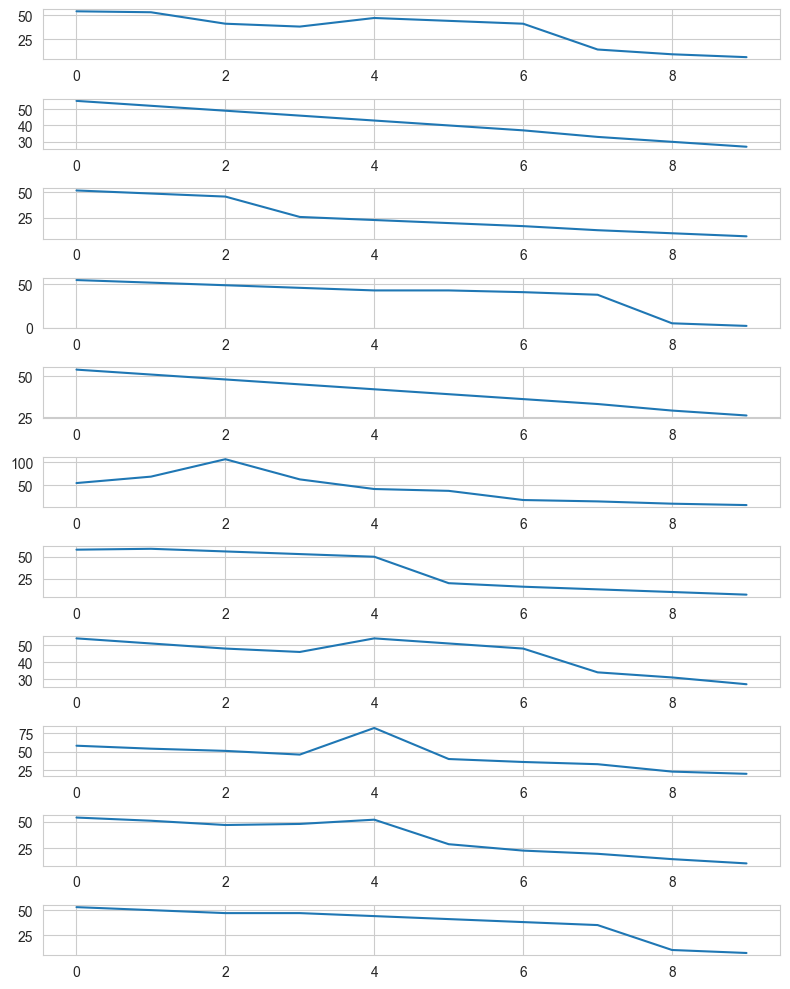

In [8]:
vis_data_name = "vertices"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

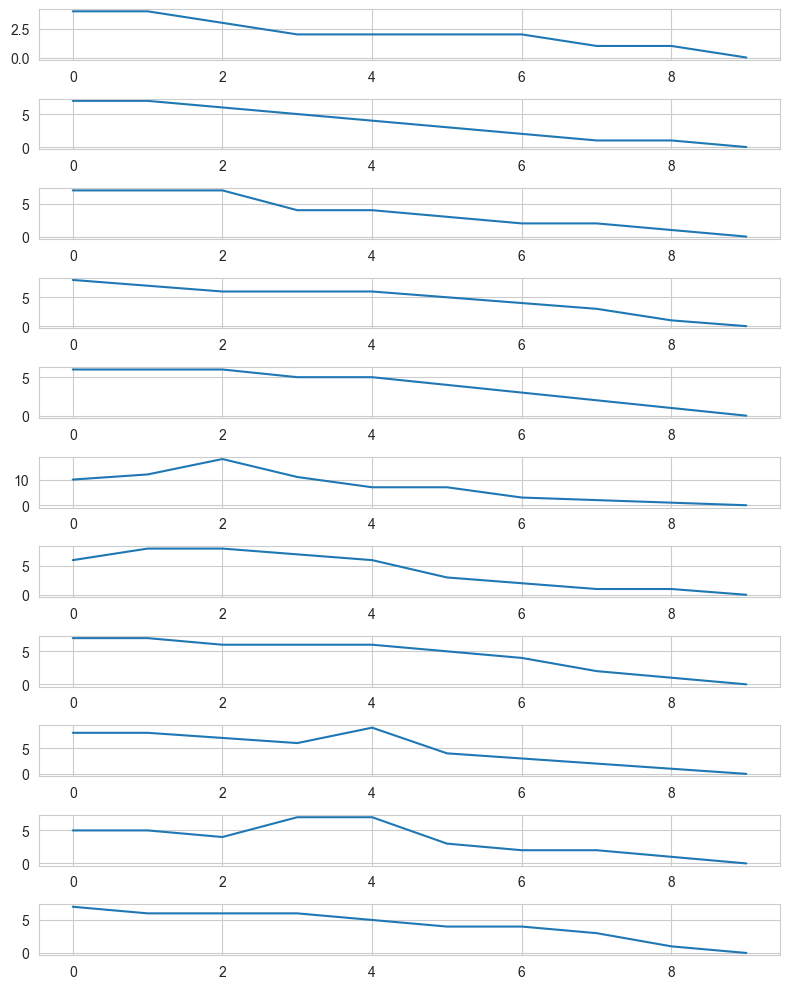

In [9]:
vis_data_name = "redexes"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

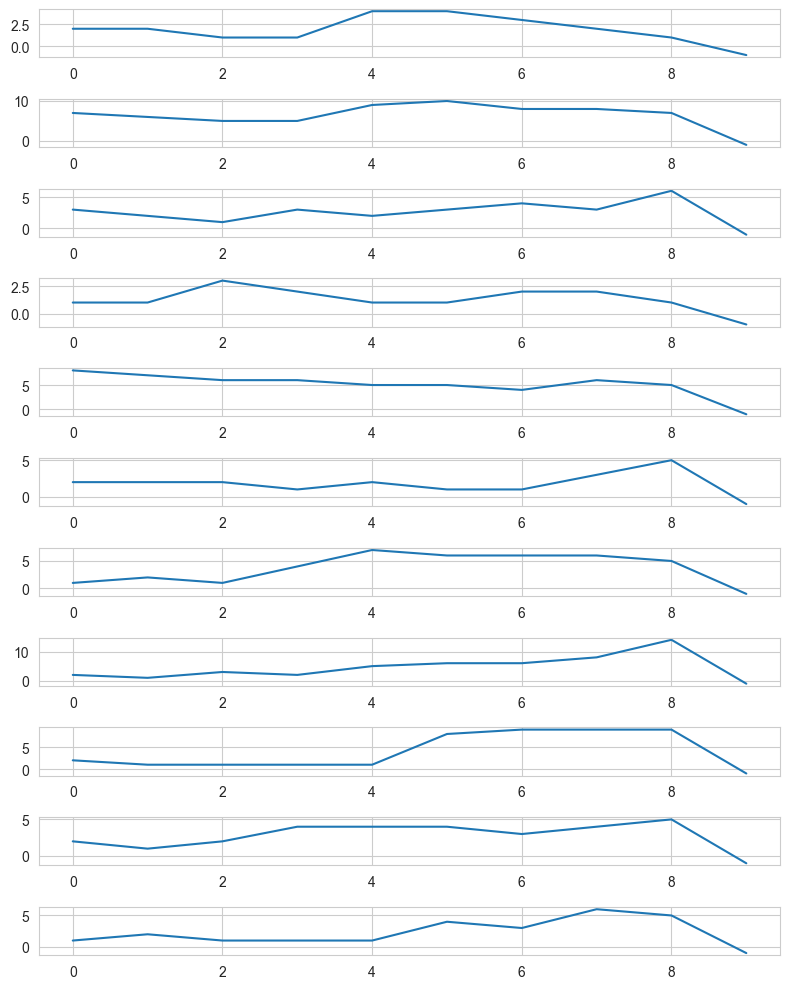

In [10]:
vis_data_name = "redex_depths"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

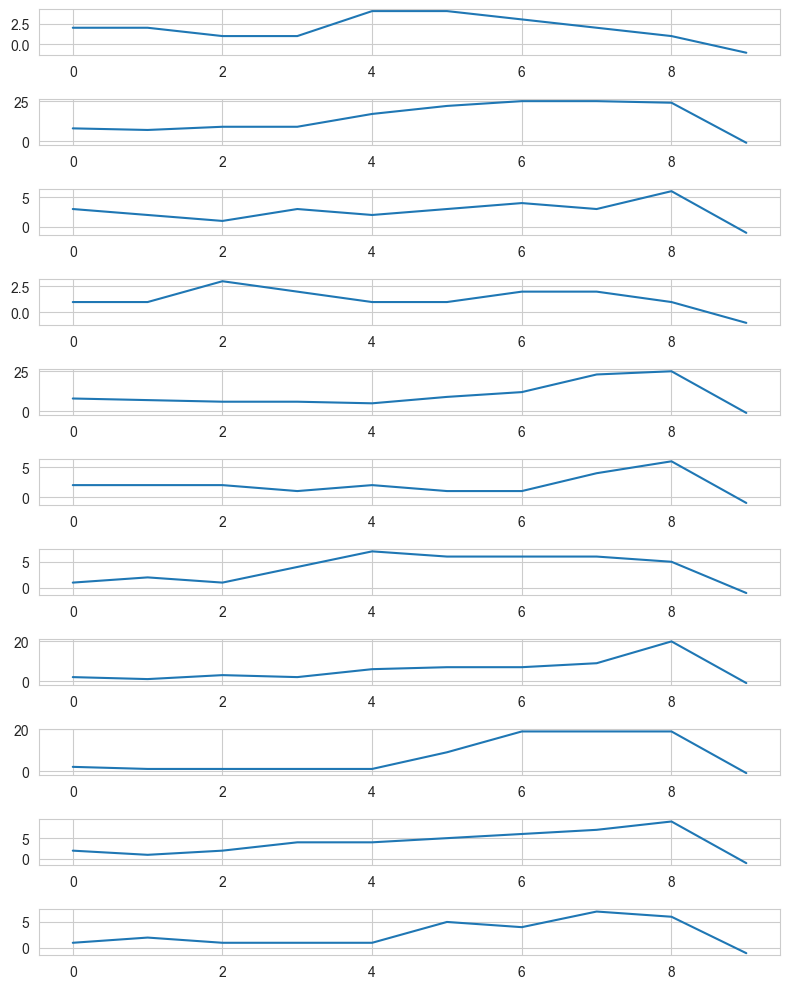

In [11]:
vis_data_name = "redex_indexes"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

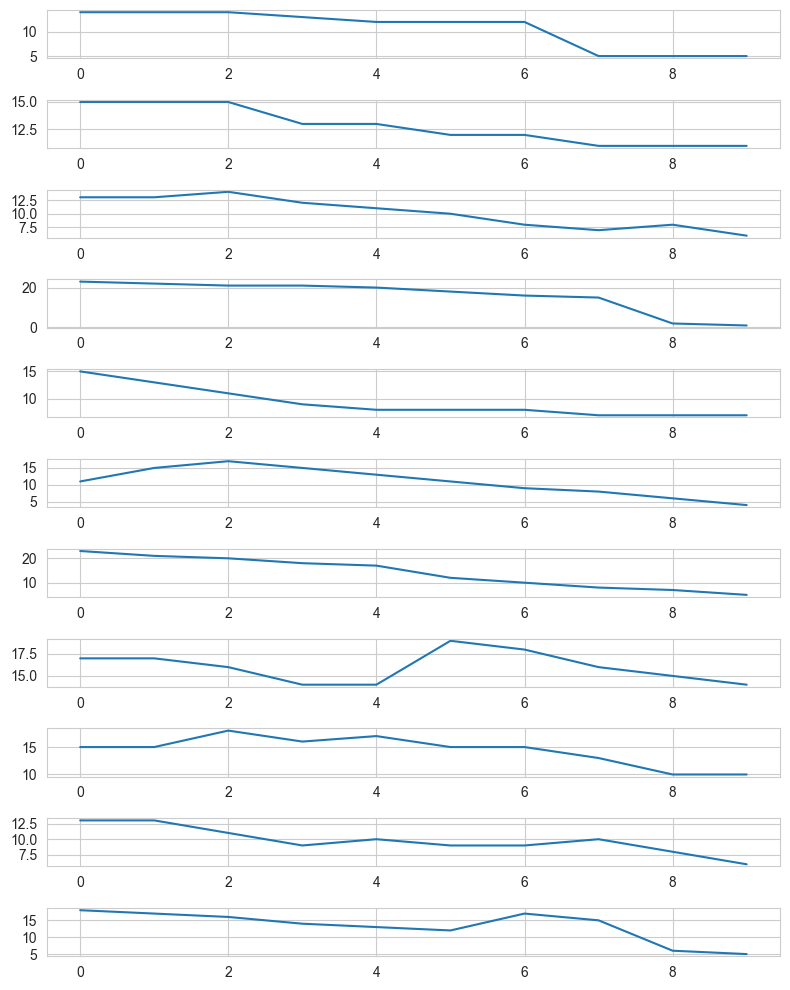

In [12]:
vis_data_name = "heights"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

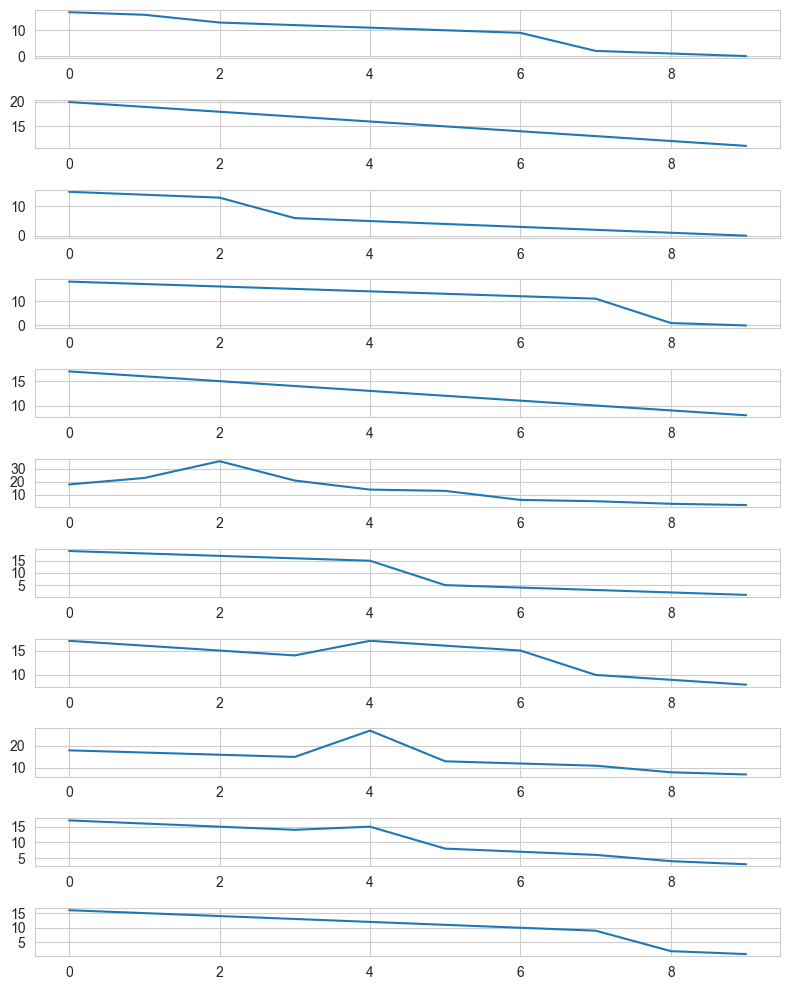

In [13]:
vis_data_name = "widths"
df_to_draw = {key_: norm_data[vis_data_name] for key_, norm_data in norm_data_LO_tLO_9.items()}

plot_multi_lines(df_to_draw)

In [14]:
def plot_multi_multi_lines(plt_data: dict, ):
    # Create separate subplots
    fig, ax_list = plt.subplots(len(plt_data.keys()), 1, figsize=(8, 10))

    # Plot the lines on each subplot
    for (key_, data_), ax_ in zip(plt_data.items(), ax_list):
        for dkey_, val_ in data_.items():
            ax_.plot(range(len(val_)), val_, label=dkey_)
        ax_.set_title(key_)
        ax_.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

In [15]:
norm_data_LO_tLO_9.keys()

dict_keys(['inx_0', 'inx_1', 'inx_2', 'inx_3', 'inx_4', 'inx_5', 'inx_6', 'inx_7', 'inx_8', 'inx_9', 'inx_10'])

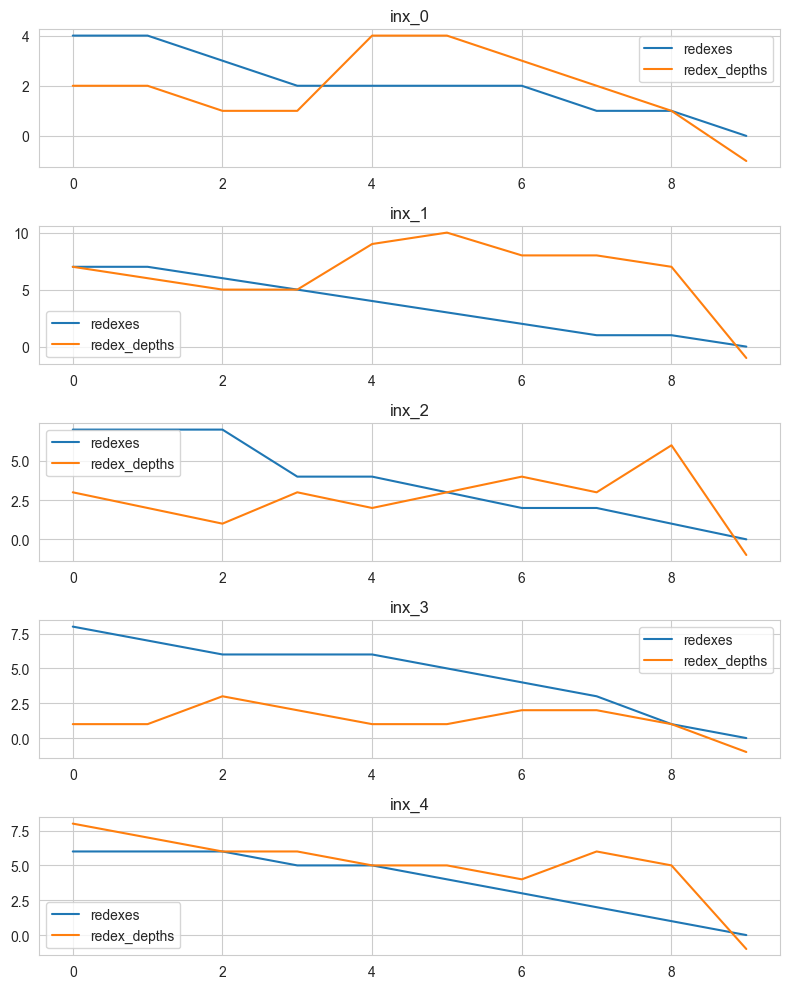

In [16]:
# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

keys_to_keep = ['inx_0', 'inx_1', 'inx_2', 'inx_3', 'inx_4']
# keys_to_keep = ['inx_5', 'inx_6', 'inx_7', 'inx_8', 'inx_9', 'inx_10']
dkeys_to_keep = ["redexes", "redex_depths"]

vis_df = {key: {dkey: value for dkey, value in data.items() if dkey in dkeys_to_keep} for key, data in norm_data_LO_tLO_9.items() if key in keys_to_keep}
plot_multi_multi_lines(vis_df)

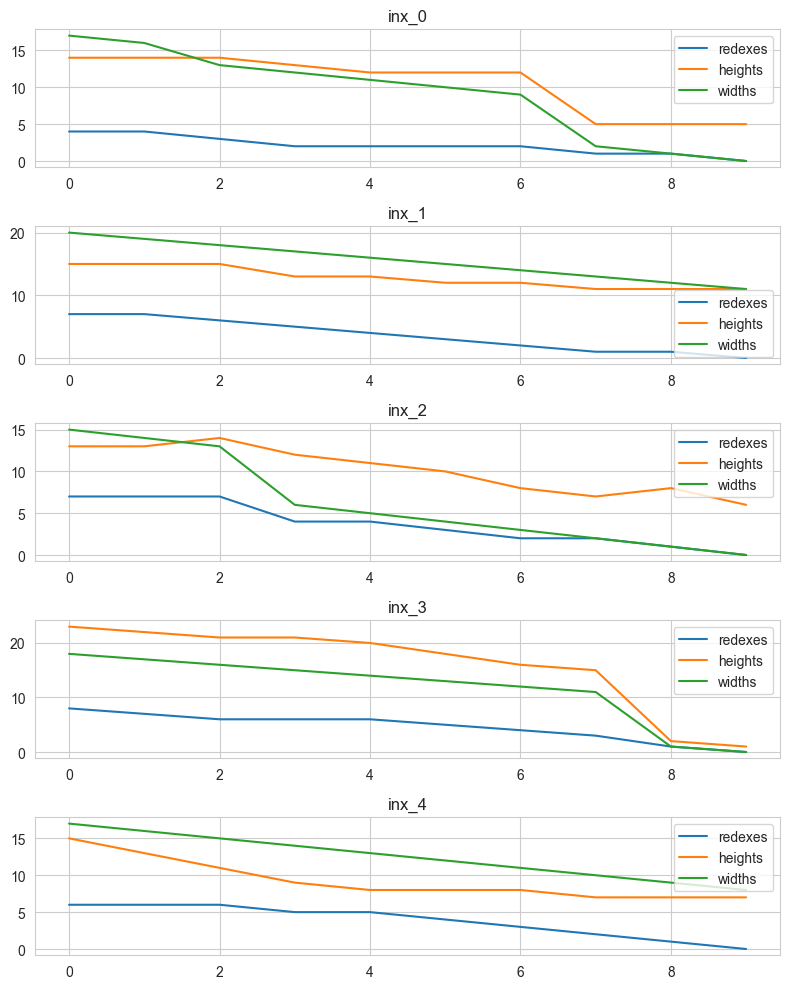

In [17]:
# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

keys_to_keep = ['inx_0', 'inx_1', 'inx_2', 'inx_3', 'inx_4']
# keys_to_keep = ['inx_5', 'inx_6', 'inx_7', 'inx_8', 'inx_9', 'inx_10']
dkeys_to_keep = ["redexes", "widths", "heights"]

vis_df = {key: {dkey: value for dkey, value in data.items() if dkey in dkeys_to_keep} for key, data in norm_data_LO_tLO_9.items() if key in keys_to_keep}
plot_multi_multi_lines(vis_df)

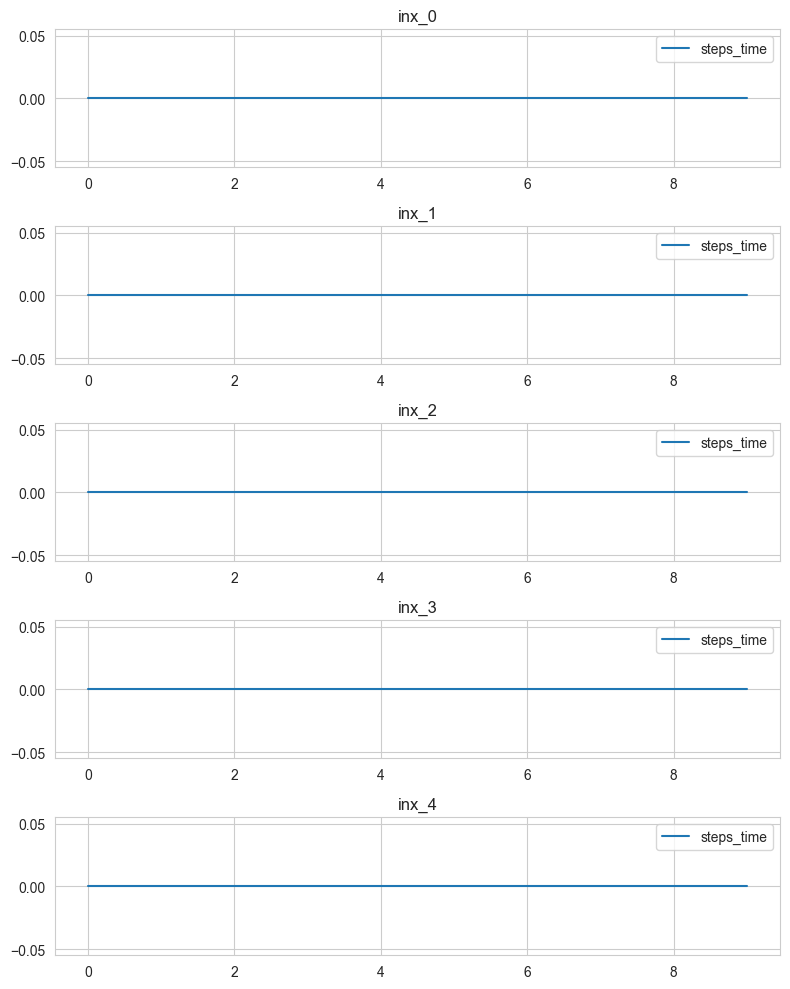

In [18]:
# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

keys_to_keep = ['inx_0', 'inx_1', 'inx_2', 'inx_3', 'inx_4']
# keys_to_keep = ['inx_5', 'inx_6', 'inx_7', 'inx_8', 'inx_9', 'inx_10']
dkeys_to_keep = ["steps_time",]

vis_df = {key: {dkey: value for dkey, value in data.items() if dkey in dkeys_to_keep} for key, data in norm_data_LO_tLO_9.items() if key in keys_to_keep}
plot_multi_multi_lines(vis_df)